# Import libraries

In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [5]:
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Load data

In [6]:
start = time.time()
df = pd.read_csv('./rawData/accepted_2007_to_2018Q4.csv')
print(f'Load time : {time.time() - start}')

Load time : 27.257620334625244


In [7]:
df.shape

(2260701, 151)

# Data cleaning

In [8]:
# All member_id are NaN, depersonalized. URLs are useless, drop both
try:
    df.drop(['member_id', 'url'], inplace=True, axis=1)
except:
    pass

# inspect the actual records
df.sample(3).T

,1076682,8975,1588532
id,70573193,68029163,131707680
loan_amnt,11000,22800,38400
funded_amnt,11000,22800,38400
funded_amnt_inv,11000,22800,38400
term,36 months,36 months,36 months
int_rate,8.39,16.55,7.34
installment,346.69,807.79,1191.66
grade,B,D,A
sub_grade,B1,D2,A4
emp_title,Operator,Store Manager,IS Program Manager


In [9]:
df[df.loan_amnt.isna().T]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
421095,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,Total amount funded in policy code 2: 1944088810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528961,Total amount funded in policy code 1: 1741781700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
df = df[~df.loan_amnt.isna()]

In [11]:
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

def clean_date(x):
    if pd.isnull(x):
        return None
    else:
        return datetime.datetime.strptime(x, "%b-%Y").date()

start = time.time()
for i in date_cols:
    try:
        df[i] = df[i].apply( clean_date )
    except:
        pass
print(f'Time : {time.time() - start}')

Time : 57.21321940422058


# Data selection

In the loan default/survival prediction context, select only features that are:
- known at loan origination
- static, i.e. are not updated later

Among the features we kept, there are a few that are clearly irrelevant to the prediction task ('member_id') but useful for reference purposes. There are some others such as 'zip_code' for which we decided to make a data-driven conclusion as opposed to pre-select.

Target for classification:
- loan_status

Targets for regression: survival time, realized return.  Necessary components:
- funded_amnt, total_pymnt, last_pymnt_d, recoveries

In [12]:
relevant_cols = [
# ------------ loan application and LC terms                 
    'id',  # not a predictor
    'desc', # not a predictor, mapped to new var _has_desc
    'title', # not a predictor
    'application_type',   # binary  {'Individual':0, 'Joint App':1}
    'purpose',  # cardinal
    'grade',    # ordinal, map to N
    'sub_grade', # ordinal, map to N
    'term',      # binary  {'36 months':0, '60 months':1}
    'loan_amnt', # numeric
    'int_rate',  # numeric
    'installment',  # numeric
    'issue_d',   # not a predictor
    'initial_list_status',  # binary  {'w':0, 'f':1}
    'disbursement_method',  # binary  {'Cash':0, 'DirectPay':1}

# ------------ borrower (self-declared except for verification status)
    'addr_state', # cardinal
    'zip_code',   # not a predictor, b/c 956 zip_codes, too granular
    'home_ownership',  # cardinal, leave 4 categories: MORTGAGE, RENT, OWN, OTHER(+ANY,+NONE)
    'emp_length', # ordinal, map to N
    'emp_title',  # not a predictor
    'annual_inc', # numeric
    'annual_inc_joint',  # not a predictor (mapped to annual_inc)
    'verification_status',  # ordinal: {'Not Verified':0, 'Source Verified':1, 'Verified':2}
    'verification_status_joint',  # not a predictor (mapped to verification_status)

# ------------ hard credit inquiry at origination
    'fico_range_high',  # remove. fico_high=fico_low+4 or, very rarely, fico_high=fico_low+5
    'fico_range_low',  # numeric
    'delinq_2yrs',# numeric
    'dti', # numeric
    'dti_joint',  # not a predictor (mapped to dti)
    'earliest_cr_line', # not a predictor (mapped to new var _credit_hist)
    'open_acc', # numeric
    'pub_rec', # numeric
    'revol_bal', # numeric
    'revol_util', # numeric

# ------------ targets / target components 
    'loan_status',
    'funded_amnt',
    'total_pymnt',  # includes recoveries
    'last_pymnt_d',
    'last_credit_pull_d', # proxy if last_pymnt_d is NaN
    'recoveries',
]

In [13]:
print(f'{len(relevant_cols)} features selected')

# new dataframe of features
df = df[relevant_cols]

39 features selected


In [14]:
df.to_pickle('./derivedData/clean_data.pkl')

# Target selection

### Remove current

In [15]:
df.loan_status.value_counts(normalize=True)

Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: loan_status, dtype: float64

Leave: 
- Fully Paid
- Charged Off
- Default – added to Charged Off
- Does not meet the credit policy. Status:Fully Paid
- Does not meet the credit policy. Status:Charged Off

Remove:
- Current
- Late (31-120 days)
- Late (16-30 days)
- In Grace Period

In [16]:
remove_loans = ['Current','Late (31-120 days)','Late (16-30 days)','In Grace Period']
try:
    df = df[~df.loan_status.isin(remove_loans)]
except:
    pass

df.shape

(1348099, 39)

In [17]:
df.loan_status.value_counts(normalize=True)

Fully Paid                                             0.798718
Charged Off                                            0.199213
Does not meet the credit policy. Status:Fully Paid     0.001475
Does not meet the credit policy. Status:Charged Off    0.000564
Default                                                0.000030
Name: loan_status, dtype: float64

### Classification target

In [18]:
good_loan = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

In [19]:
df['_good'] = df.loan_status.isin(good_loan).astype(int)

In [20]:
df._good.value_counts(normalize=True)

1    0.800193
0    0.199807
Name: _good, dtype: float64

### Regression target

Returns are computed with a fixed time horizon (T months), such that the cash flow is reinvested each month at the yearly rate i%, compounded monthly.\

$$
     R = \frac{12}{T} \frac{1}{f} \left( \left( \frac{p}{m} \left( \frac{1-(1+i)^m}{1-(1+i)} \right) \right)(1+i)^{T-m} - f \right)
$$

- T : horizon of the investment
- f : total amount invested in the loan
- p : total amount repaid and recovered by the loan
- m : actual lenght of the loan
- i : yearly rate

In [21]:
include_returns = False

In [22]:
def return_reinvest_compound(T, i):
    # Assuming that the total amount paid back was paid at equal
    # intervals during the duration of the loan, calculate the
    # size of each of these installment
    actual_installment = (df.total_pymnt - df.recoveries) / df['loan_length']

    # Assuming the amount is immediately re-invested at the prime
    # rate, find the total amount of money we'll have by the end
    # of the loan
    cash_by_end_of_loan = actual_installment * (1 - pow(1 + i, df.loan_length)) / (1 - (1 + i))
    
    cash_by_end_of_loan = cash_by_end_of_loan + df.recoveries
    
    # Assuming that cash is then re-invested at the prime rate,
    # with monthly re-investment, until T months from the start
    # of the loan
    remaining_months = T - df['loan_length']
    final_return = cash_by_end_of_loan * pow(1 + i, remaining_months)

    # Find the percentage return
    return((12/T) * ((final_return - df['funded_amnt']) / df['funded_amnt']))

df['loan_length'] = (df['last_pymnt_d'] - df['issue_d']) / np.timedelta64(1, 'M')

if include_returns:
    df['returns_1'] = return_reinvest_compound(5*12, .001)
    df['returns_25'] = return_reinvest_compound(5*12, .0025)
    df['returns_5'] = return_reinvest_compound(5*12, .005)

In [23]:
if include_returns:
    df.to_pickle('./derivedData/clean_data2.pkl')
else:
    df.to_pickle('./derivedData/clean_data.pkl')

## Issue date

Lending Club registered its first prospectus with the SEC in October 2008. Assume consistent client onboarding and risk assessment started in January 2009, remove all earlier loans (0.22% of all loans). This will also take care of some of the missing data.

In [24]:
print(f'Min issue date : {df.issue_d.min()}')
print(f'Max issue date : {df.issue_d.max()}')

Min issue date : 2007-06-01
Max issue date : 2018-12-01


In [25]:
print(f'{np.mean(df.issue_d.apply(lambda d:d.year) < 2009)*100}% of loans issued before 2009')

0.22223887118082575% of loans issued before 2009


In [26]:
df = df[df.issue_d.apply(lambda d:d.year) >= 2009]

In [27]:
df.shape

(1345103, 41)

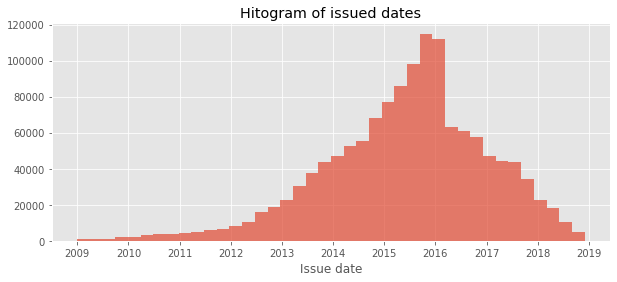

In [28]:
plt.figure(figsize=(10,4))
plt.hist(df.issue_d, bins=40, alpha=.7)
plt.title('Hitogram of issued dates')
plt.xlabel('Issue date')
plt.show()

# Data imputation

In [29]:
na = df.isna().sum()
na[na>0].sort_values(ascending=False)

verification_status_joint    1319502
dti_joint                    1319300
annual_inc_joint             1319297
desc                         1222129
emp_title                      85799
emp_length                     78550
title                          16660
loan_length                     2322
last_pymnt_d                    2322
revol_util                       853
dti                              374
last_credit_pull_d                54
zip_code                           1
dtype: int64

The missing zip cosw is a loan issued in Alabama, it can therefore be filled by '355xx'

In [30]:
df[df.zip_code.isna()]

,id,desc,title,application_type,purpose,grade,sub_grade,term,loan_amnt,int_rate,installment,issue_d,initial_list_status,disbursement_method,addr_state,zip_code,home_ownership,emp_length,emp_title,annual_inc,annual_inc_joint,verification_status,verification_status_joint,fico_range_high,fico_range_low,delinq_2yrs,dti,dti_joint,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,loan_status,funded_amnt,total_pymnt,last_pymnt_d,last_credit_pull_d,recoveries,_good,loan_length
1736050,96387212,NaN,Debt consolidation,Individual,debt_consolidation,C,C5,36 months,5600.0,15.99,196.86,2017-01-01,f,Cash,AL,NaN,MORTGAGE,10+ years,Electrician,40000.0,NaN,Verified,NaN,674.0,670.0,0.0,22.86,NaN,2005-07-01,8.0,1.0,7129.0,68.5,Fully Paid,5600.0,6895.874445,2019-02-01,2019-02-01,0.0,1,25.002567


In [31]:
df.zip_code.fillna('355xx', inplace=True)

In [32]:
df.desc.fillna('', inplace=True)
df.emp_title.fillna('', inplace=True)
df.title.fillna('', inplace=True)

In [33]:
df[df.last_pymnt_d.isna()].loan_status.value_counts()

Charged Off                                            2312
Does not meet the credit policy. Status:Charged Off      10
Name: loan_status, dtype: int64

In [34]:
df.last_pymnt_d = np.where(df.last_pymnt_d.isna(), df.last_credit_pull_d, df.last_pymnt_d)
df.loan_length = np.where(df.loan_length.isna(),
                          (df.last_pymnt_d - df.issue_d) / np.timedelta64(1, 'M'),
                          df.loan_length)
df.loan_length[df.loan_length < 0] = 0

In [35]:
df.revol_util.fillna(0, inplace=True)

In [36]:
print(f'Application type : {df.application_type.unique()}')
print(f'Verif status joint : {df.verification_status_joint.unique()}')

Application type : ['Individual' 'Joint App']
Verif status joint : [nan 'Not Verified' 'Verified' 'Source Verified']


In [37]:
df.dti = np.where(df.application_type == 'Joint App', df.dti_joint, df.dti)
df.annual_inc = np.where(df.application_type == 'Joint App', df.annual_inc_joint, df.annual_inc)
df.verification_status = np.where(df.verification_status_joint == 'Verified',
                                  df.verification_status_joint,
                                  df.verification_status)

df.drop(columns = ['dti_joint', 'annual_inc_joint', 'verification_status_joint'], inplace=True)

In [38]:
df = df[~df.dti.isna()]

In [39]:
df.emp_length.value_counts(normalize=True, dropna=False)

10+ years    0.328729
2 years      0.090500
< 1 year     0.080199
3 years      0.080004
1 year       0.065725
5 years      0.062586
4 years      0.059889
NaN          0.058397
6 years      0.046632
8 years      0.045130
7 years      0.044326
9 years      0.037881
Name: emp_length, dtype: float64

In [40]:
# For missing emp.length, assume it's roughly equivalent to years since earliest credit card
def distance_years(distance):
    if distance>=10:   return '10+ years'
    elif distance <1:  return '< 1 year'
    else:              return f'{int(distance)} years'

credit_history = np.round((df.issue_d - df.earliest_cr_line) / np.timedelta64(1,'Y'))
df.emp_length = np.where(df.emp_length.isna(), 
                         np.vectorize(distance_years)(credit_history), 
                         df.emp_length)

In [41]:
df.drop(columns=['last_credit_pull_d'], inplace=True)

In [42]:
na = df.isna().sum()
print(na[na > 0].sort_values(ascending=False))
print(df.shape)

Series([], dtype: int64)
(1345100, 37)


In [43]:
if include_returns:
    df.to_pickle('./derivedData/clean_data2.pkl')
else:
    df.to_pickle('./derivedData/clean_data.pkl')

# Finalize data

In [44]:
df['_has_desc'] = np.vectorize(len)(df.desc) > 0
df._has_desc = df._has_desc.astype(int)

In [45]:
df['_credit_hist'] = credit_history

In [46]:
ordinal = [
    'application_type', 
    'grade',
    'sub_grade',
    'term',
    'initial_list_status',  # LC claims this is purely random: chi2 test!
    'emp_length',
    'verification_status',
    '_has_desc',
]

In [47]:
df.home_ownership.replace({'ANY':'OTHER', 'NONE':'OTHER'}, inplace=True)

nominal = [
  'purpose',
  'addr_state', # if linear models do not pick up this feature, revisit amd remove dummies (probably too much noise)
  'home_ownership',
  'disbursement_method', #highly imbalanced and probably irrelevant
]

In [48]:
numeric = [
    'loan_amnt', # numeric
    'int_rate',  # numeric
    'installment',  # numeric
    'annual_inc', # numeric
    'fico_range_low', 
    'delinq_2yrs',# numeric
    'dti', # numeric
    'open_acc', # numeric
    'pub_rec', # numeric
    'revol_bal', # numeric
    'revol_util', # numeric
    '_credit_hist', # new numeric
]
if include_returns:
    numeric = numeric + ['returns_1', 'returns_25', 'returns_5', 'loan_length']

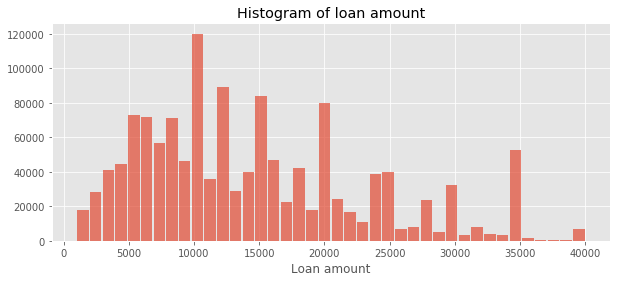

In [49]:
plt.figure(figsize=(10,4))
plt.hist(df.loan_amnt, bins=40, alpha=.7, rwidth=.9)
plt.title('Histogram of loan amount')
plt.xlabel('Loan amount')
plt.show()

In [50]:
for c in numeric:
    print(f'{c} \t \t {df[c].dtype}')

loan_amnt 	 	 float64
int_rate 	 	 float64
installment 	 	 float64
annual_inc 	 	 float64
fico_range_low 	 	 float64
delinq_2yrs 	 	 float64
dti 	 	 float64
open_acc 	 	 float64
pub_rec 	 	 float64
revol_bal 	 	 float64
revol_util 	 	 float64
_credit_hist 	 	 float64


In [51]:
# FREEZE THE DATAFRAME BEYOND THIS POINT
# convert 'id' to numeric and set as index 
try:
    df['id'] = df['id'].astype(int)
    df.set_index('id', inplace=True)
except:
    pass
print(df.shape)

(1345100, 38)


In [52]:
if include_returns:
    df.to_pickle('./derivedData/clean_data2.pkl')
else:
    df.to_pickle('./derivedData/clean_data.pkl')

# Visualize variables

In [53]:
def visualize_categorical(col):
    _, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
        
    grouped_col = df.groupby(by=col).count()._good
    rot=0 if len(grouped_col)<8 else 90
    ax[0].bar(grouped_col.index, height=grouped_col)
    for pos, val in enumerate(grouped_col.values):
        ax[0].text(pos, 1.02*val, f'{int(val/1000):,}', rotation=rot, color='k', ha='center')
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} : # of loans')
    plt.setp( ax[0].xaxis.get_majorticklabels(), rotation=rot )
    
    grouped_col = df.groupby(by=col).mean()._good
    rot=0 if len(grouped_col)<8 else 90
    ax[1].bar(grouped_col.index, height=grouped_col)
    for pos, val in enumerate(grouped_col.values):
        ax[1].text(pos, 1.02*val, f'{val:.3f}', rotation=rot, color='k', ha='center')
    ax[1].set_xlabel(col)
    ax[1].set_title(f'Proportion of good loans')
    plt.setp( ax[1].xaxis.get_majorticklabels(), rotation=rot )
    
    plt.show()

In [54]:
def visualize_numeric(col):
    _,ax = plt.subplots(1, 2, figsize=(14, 4))

    ax[0].hist(df[col], bins=40)
    ax[0].set_title(f'{col} histogram')
    ax[0].set_xlabel(col)

    ax[1] = sns.violinplot(col,'_good',data=df, orient='h')
    ax[1].set_title(f'density good vs default')
    ax[1].set_xlabel(col)

    plt.show()

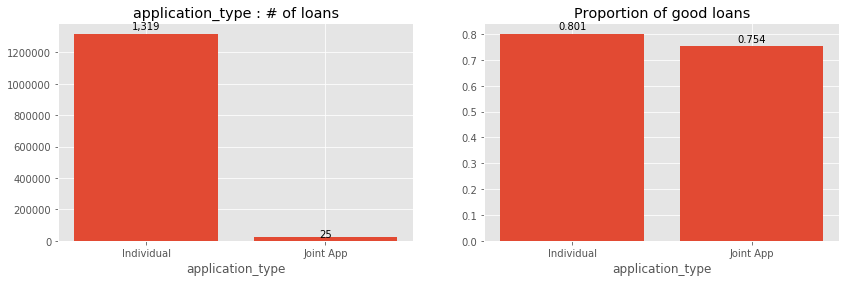

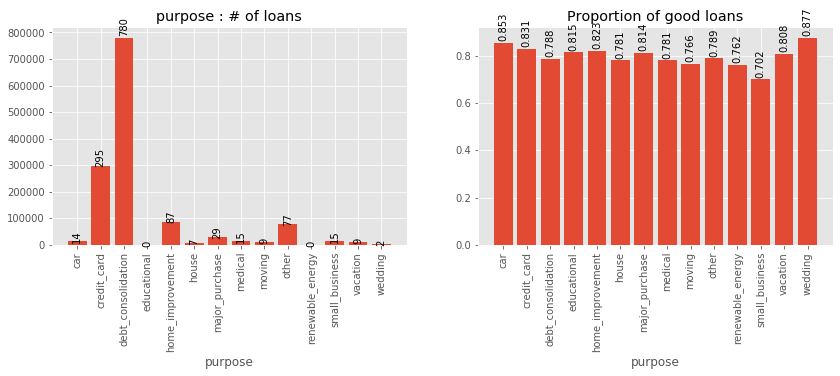

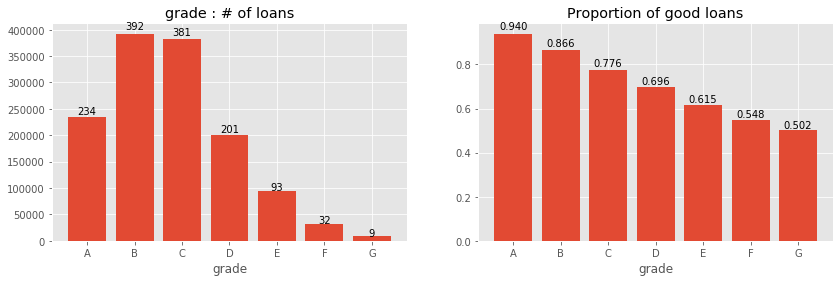

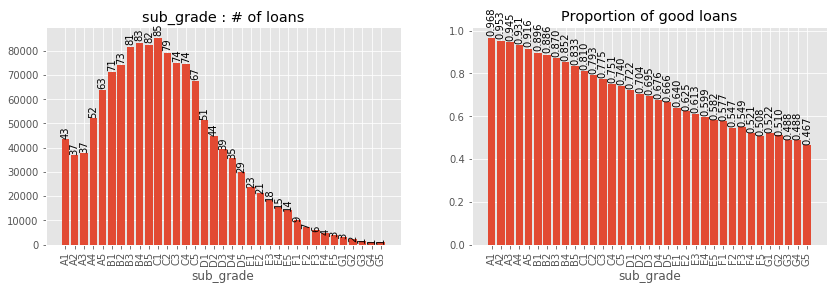

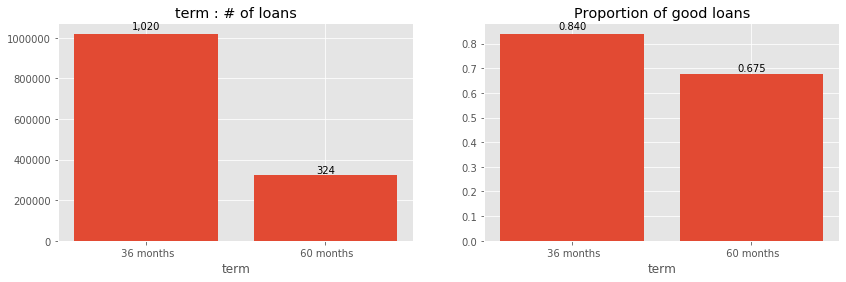

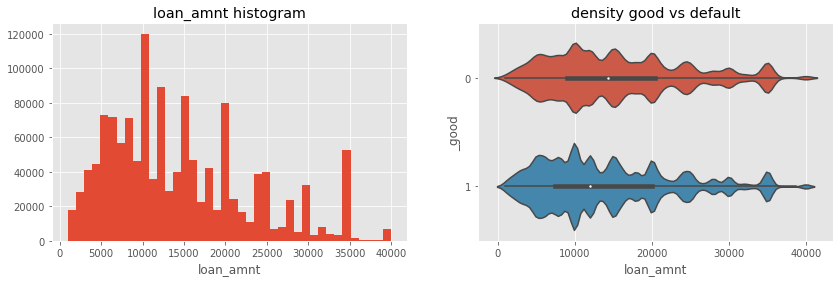

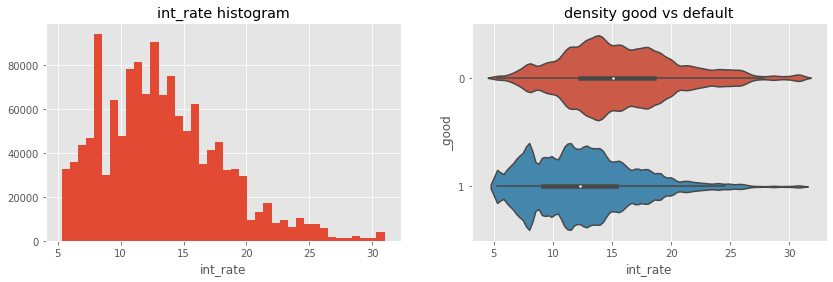

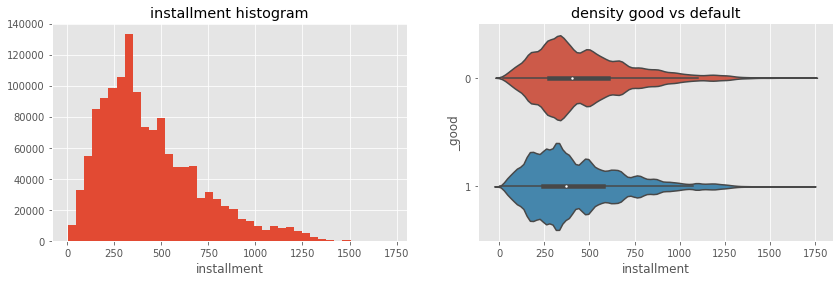

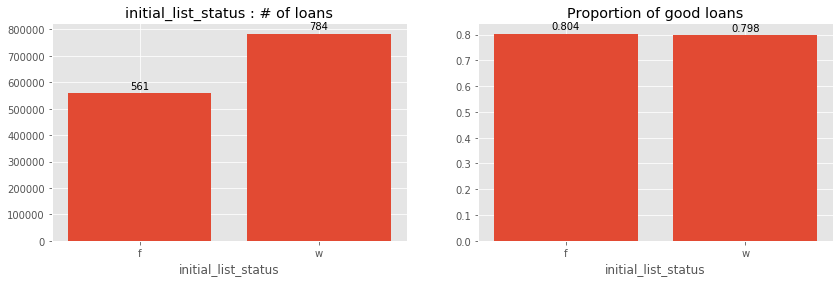

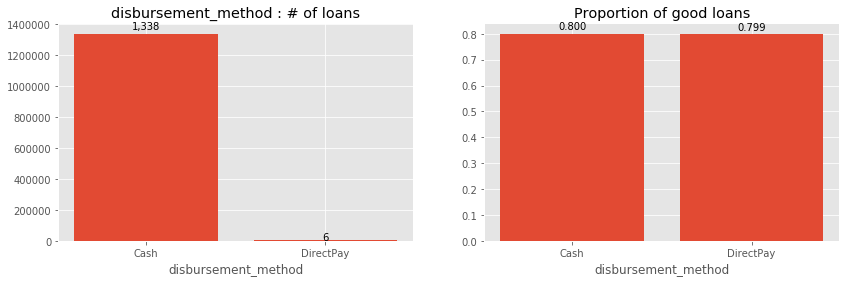

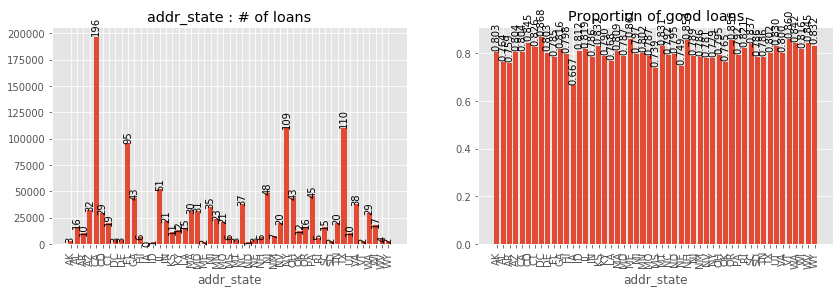

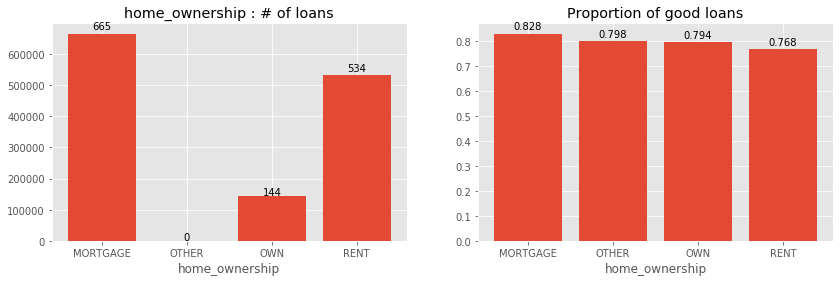

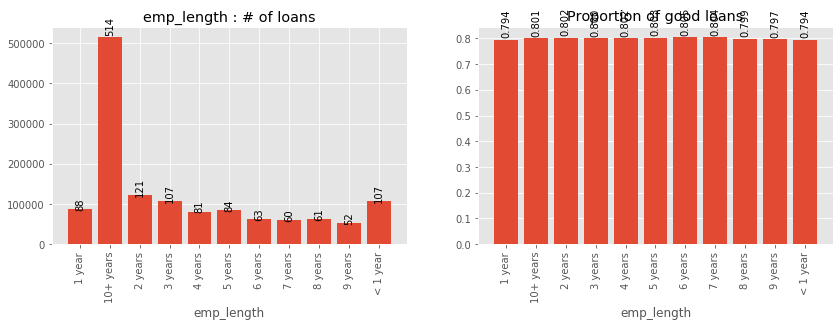

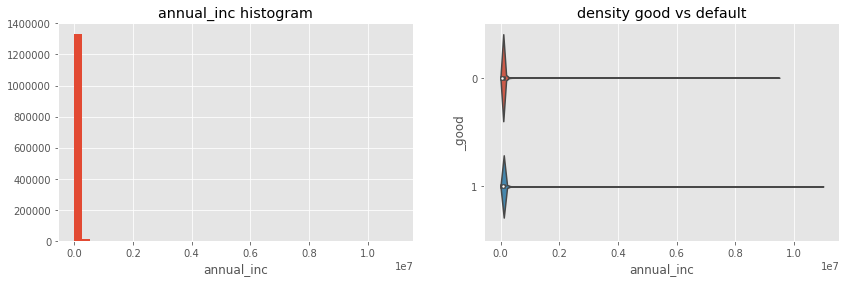

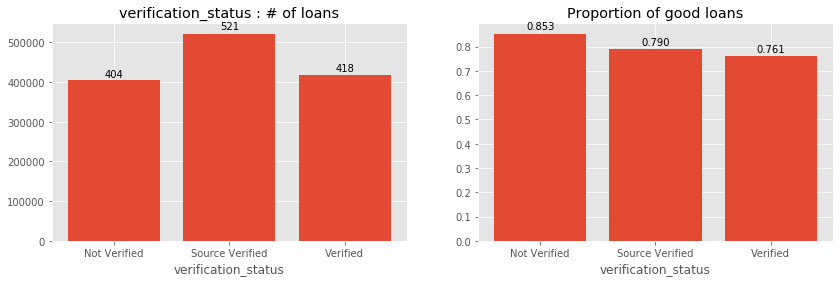

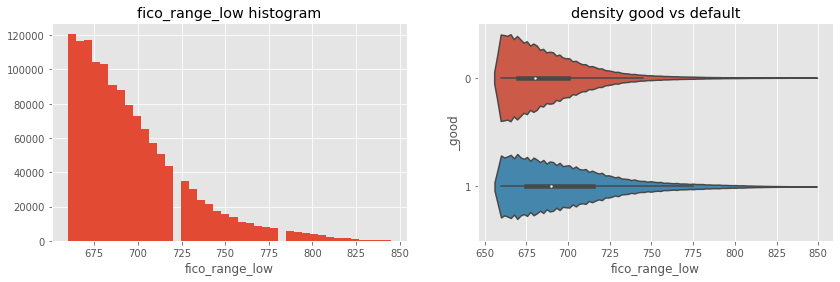

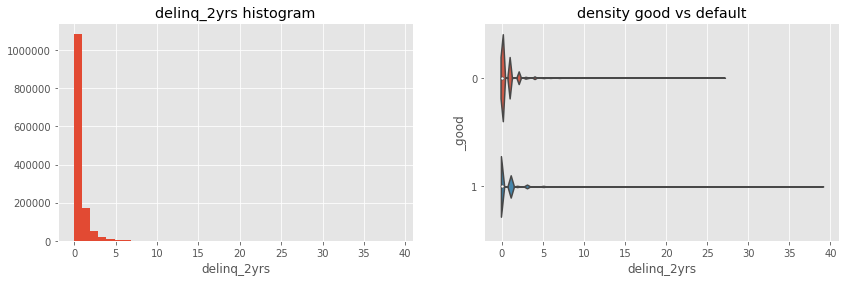

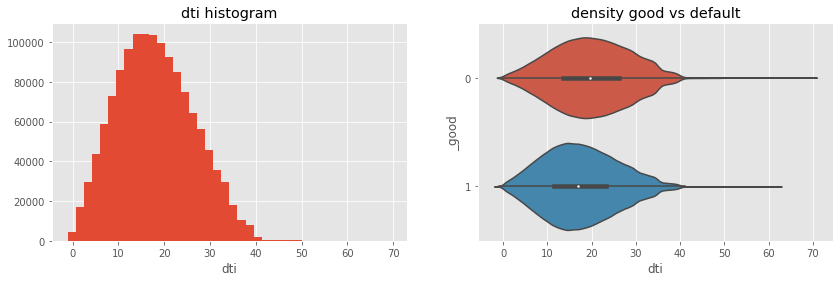

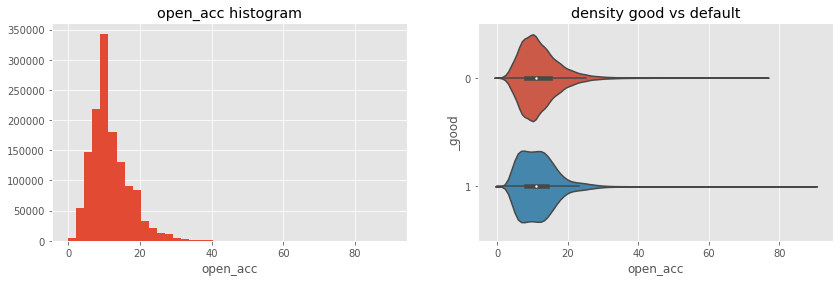

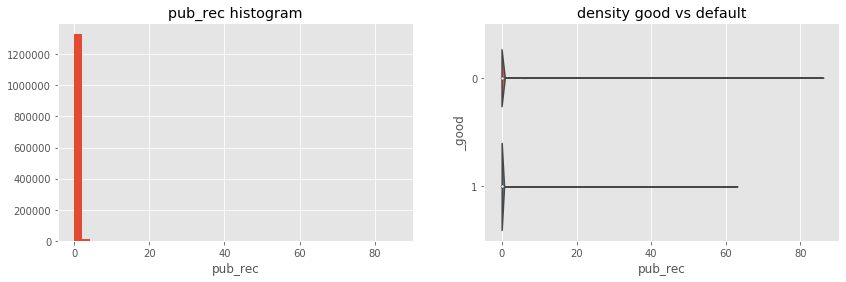

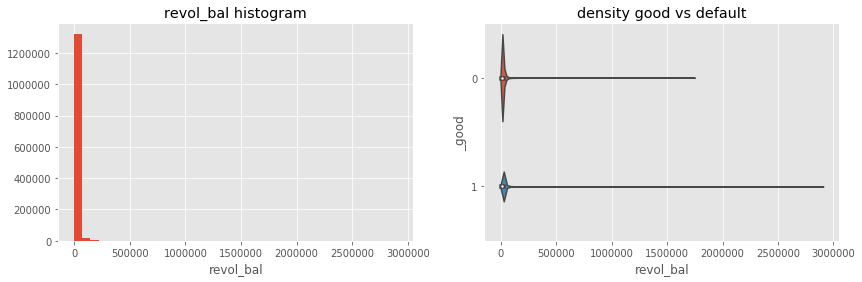

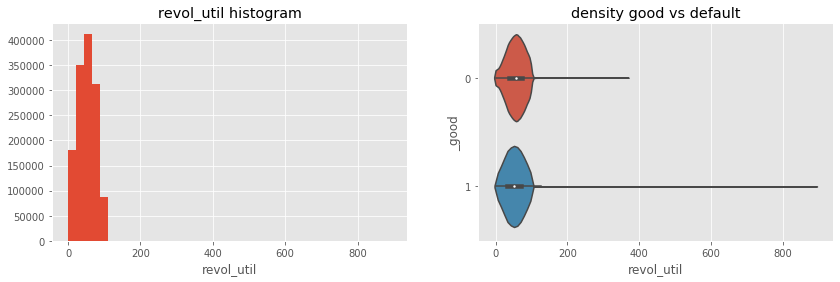

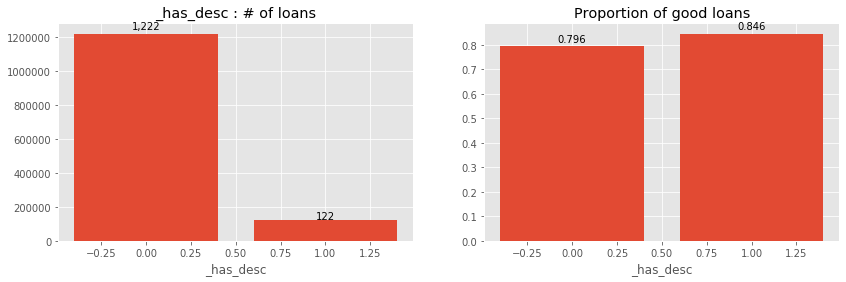

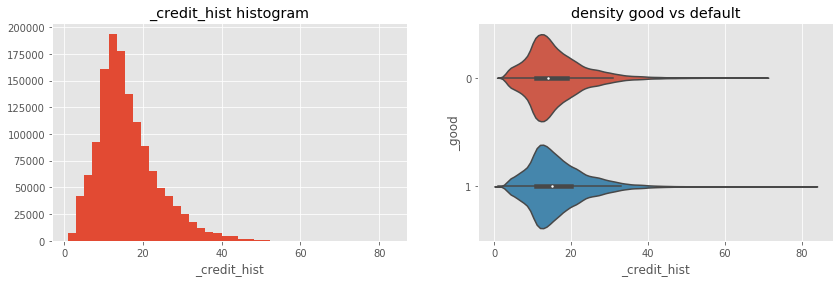

In [55]:
for col in df.columns:
    if col in ordinal+nominal:
        visualize_categorical(col)
    if col in numeric:
        visualize_numeric(col)
    else:
        continue

# Train-test split

In [56]:
df = pd.read_pickle('./derivedData/clean_data.pkl')

In [57]:
df = df.sort_values(by='issue_d', ascending=True)

In [58]:
X = df.drop(columns='loan_length')
Y = df.loan_length

In [59]:
test_mode = 'recent'

if test_mode == 'random':
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                       test_size=.2,
                                                       random_state = 42)

elif test_mode == 'recent':
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                       test_size=.2,
                                                       shuffle = False)

X_train.to_pickle(f'./derivedData/X_train_{test_mode}.pkl')
Y_train.to_pickle(f'./derivedData/Y_train_{test_mode}.pkl')
X_test.to_pickle(f'./derivedData/X_test_{test_mode}.pkl')
Y_test.to_pickle(f'./derivedData/Y_test_{test_mode}.pkl')

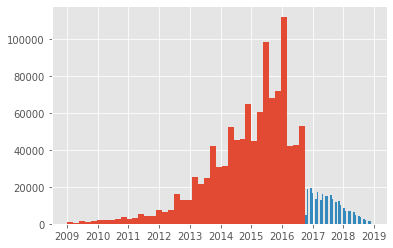

In [60]:
plt.hist(X_train.issue_d, bins=40)
plt.hist(X_test.issue_d, bins=40)
plt.show()

In [61]:
print(X_train.issue_d.min())
print(X_train.issue_d.max())

2009-01-01
2016-10-01


In [62]:
print(X_test.issue_d.min())
print(X_test.issue_d.max())

2016-10-01
2018-12-01


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(df.shape)

assert X_train.shape[0] + X_test.shape[0] == df.shape[0]

In [ ]:
1076080+269020